In [33]:
import gym
import gym_maze
import time
import random
import numpy
import matplotlib.pyplot as plt

In [34]:
N = 0
E = 1
S = 2
W = 3

In [35]:
SIZE = 10

In [36]:
def draw_values(data, cell_width=1, cell_height=1):
    # Prepare data for plotting
    values = [data.get(i, 0) for i in range(100)]

    grid_values = [values[i:i+10] for i in range(0, len(values), 10)]

    # Calculate the total size of the figure
    fig_width = 10 * cell_width
    fig_height = 10 * cell_height

    # Create the plot with specified figure size
    plt.figure(figsize=(fig_width, fig_height))
    plt.imshow(grid_values, cmap='viridis', interpolation='nearest')

    # Add text annotations with values formatted to 3 decimal places
    for i in range(10):
        for j in range(10):
            plt.text(j, i, '{:.3f}'.format(grid_values[i][j]), ha='center', va='center', color='black')

    # Customize plot aesthetics
    plt.title('Grid Visualization')
    plt.colorbar(label='Values')
    plt.xticks(range(10), range(10))
    plt.yticks(range(10), range(10))
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.grid(visible=False)
    plt.show()

In [37]:
def draw_grid(directions, no_arrow_positions = []):
    rows = 10
    columns = 10
    cell_size = 1

    fig, ax = plt.subplots()

    for row in range(rows):
        for col in range(columns):
            index = row * columns + col
            direction = directions.get(index, None)

            if direction is not None and index not in no_arrow_positions:
                x = col * cell_size + cell_size / 2
                y = (rows - 1 - row) * cell_size + cell_size / 2

                if direction == 0:  # Upward arrow
                    ax.arrow(x, y, 0, cell_size / 4, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 2:  # Right arrow
                    ax.arrow(x, y, cell_size / 4, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 1:  # Downward arrow
                    ax.arrow(x, y, 0, -cell_size / 4, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 3:  # Left arrow
                    ax.arrow(x, y, -cell_size / 4, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
            elif index in no_arrow_positions:
                c = 'black'
                if index == 47:
                    c = 'green'
                    
                ax.add_patch(plt.Rectangle((col, rows - 1 - row), 1, 1, color=c))

    ax.set_aspect('equal')
    ax.set_xlim(0, columns)
    ax.set_ylim(0, rows)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

In [46]:
def map_state(state):
    return state[1] * ROW + state[0] 

In [50]:
def get_row_col(state):
    return (state % COLUMN, state // COLUMN)

In [40]:
def get_deterministic_state(state, action):
    c, r = get_row_col(state)
    if action == N:
        if r == 0:
            return state
        return state - SIZE

    if action == E:
        if c == SIZE - 1:
            return state
        return state + 1

    if action == S:
        if r == SIZE - 1:
            return state
        return state + SIZE

    if action == W:
        if c == 0:
            return state
        return state - 1

In [41]:
def select_action(Q, s, epsilon = 1):
    if(random.random() < epsilon):
        return random.randint(0, 3)
    else:
        action = 0
        for i in range(4):
            if Q[s][i] > Q[s][action]:
                action = i

        return action

In [48]:
# Create an environment
env = gym.make("maze-random-10x10-plus-v0")
observation = env.reset()

# Gets the size of the maze
COLUMN, ROW = env.maze_size
CELLS = COLUMN * ROW

# Define the maximum number of iterations
NUM_EPISODES = 1000000

learning_rate = 0.01
gamma = 0.99
epsilon = 1

Q = {}
for i in range(CELLS):
    Q[i] = [0 for j in range(4)]

# Transition Function
transition = {}

state = observation
success = 0
for episode in range(NUM_EPISODES):
    mapped_state = map_state(state)

    # Updating the transition function
    if mapped_state not in transition:
        transition[mapped_state] = {}
    
    action = select_action(Q, mapped_state, epsilon)

    if action not in transition[mapped_state]:
        transition[mapped_state][action] = []

    # Linear Decay of epsilon
    epsilon -= (1 / NUM_EPISODES)
             
    next_state, reward, done, truncated = env.step(action)
    mapped_next_state = map_state(next_state)

    if mapped_next_state not in transition[mapped_state][action]:
        transition[mapped_state][action].append(mapped_next_state)

    # Calculating sum of prob*Q(sp,a)
    p_q_val = 0
    for sp in transition[mapped_state][action]:
        if get_deterministic_state(mapped_state, action) == sp:
            prob = 0.6
        else:
            prob = 0.2
        p_q_val += prob * Q[mapped_next_state][action]
    
    Q[mapped_state][action] += learning_rate * (reward + gamma * max(Q[mapped_next_state]) - Q[mapped_state][action])
    # cnt += 1

    state = next_state
    
    if mapped_next_state == CELLS - 1:
        success += 1
        print(episode)

    if done or truncated:
        observation = env.reset()
        state = observation
        
env.render()
time.sleep(10)
# Close the environment
env.close()

TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

In [ ]:
print(NUM_EPISODES / (success * 10))

In [ ]:
print((success * 100) / NUM_EPISODES)

In [ ]:
pi = {}
V = {}

for state in range(100):
    mx = 0
    for i in range(4):
        if(Q[state][i] > Q[state][mx]):
            mx = i
            
    pi[state] = mx
    V[state] = Q[state][mx]

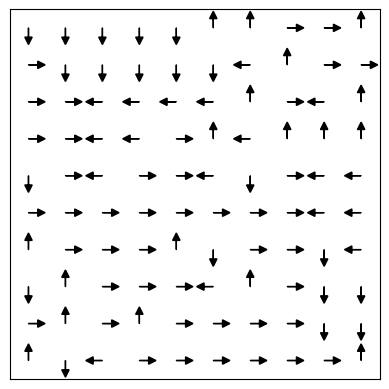

In [44]:
draw_grid(pi)

In [ ]:
draw_values(V)

In [ ]:
Q

In [56]:
get_row_col(10)

(0, 1)